ДЗ 10 Python A/B
В этом задании вам необходимо использовать набор данных ad.csv.

1) Датасет содежит 2 столбца: объявление (A/B) и действие (0/1).

2) Вам необходимо сформулировать гипотезу, провести ее проверку (пользуясь классическим подходом) и ответить на вопрос какое из объявлений лучше.

Управляющая компания принимает меры по улучшению сбора денежных средств за услуги ЖКХ. Оплата за ЖКХ составляет в среднем в течении месяца 30%, но будет отлично, если оплата увеличится до 80%. То есть применяемые меры по борьбе с должниками будут успешными, если оплата с месяц составит около 80%.

Гипотеза:
Hо: p(a) = p(b)

H1: p(a) ≠ p(b)

где p(a) и p(b) означают соответственно сбор без мер по борьбе с должниками и с мерами. Мы также установим уровень доверия 95%, то есть α = 0,05

Значение α - это порог, который устанавливаем и делаем вывод: «Если вероятность наблюдения за результатом (p-значением) ниже α, то мы отвергаем гипотезу Hо». Поскольку наша α=0,05 (что указывает на вероятность 5%), наша уверенность (1 — α) составляет 95%.

В результате решения данной задачи, мы хотим быть на 95% уверены, что меры по борьбе с должниками повысят собираемость до 80% примерно, прежде чем отклонить нулевую гипотезу Ho.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ad.csv')

In [3]:
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


Описание набора данных:
В выборке участвуют лишь должники, имеющие хоть раз просроченность за оплату ЖКХ в течение года.

A - оплата без мер по борьбе с должниками

B - оплата с учетом мер по борьбе с должниками

action:

0 - не было оплаты

1 - была оплата

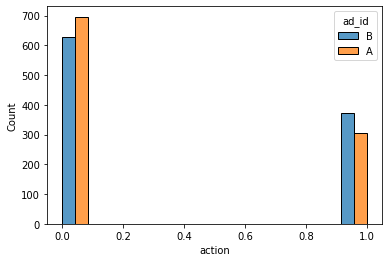

In [4]:
sns.histplot(data=df, x="action", hue="ad_id", multiple="dodge")

In [9]:
summary_df = df.pivot_table(values='action', index = 'ad_id', aggfunc=np.sum)
summary_df['total_count'] = df.pivot_table(values='action', index='ad_id', aggfunc=lambda x: len(x))

summary_df['conversion_rate'] = df.pivot_table(values='action', index='ad_id')
summary_df['std_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: np.std(x, ddof=0))
summary_df['se_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: stats.sem(x, ddof=0))

In [10]:
summary_df

,action,total_count,conversion_rate,std_p,se_p
ad_id,,,,,
A,304,1000,0.304,0.459983,0.014546
B,372,1000,0.372,0.483338,0.015285


Text(0, 0.5, 'Оплата')

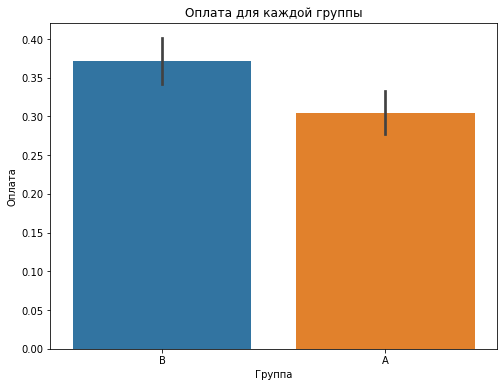

In [12]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['ad_id'], y=df['action'])

plt.title('Оплата для каждой группы')
plt.xlabel('Группа')
plt.ylabel('Оплата')

In [14]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [15]:
control_results = df[df['ad_id'] == 'A']['action']
test_results = df[df['ad_id'] == 'B']['action']

In [18]:
#Считаем кол-во элементов в каждой группе
nobs = [control_results.count(), test_results.count()]

#Считаем кол-во оплат в каждой группе
successes = [control_results.sum(), test_results.sum()]

z_stat, pval = proportions_ztest(successes, nobs)

print('z statistic:', z_stat)
print('p-value:', pval)

z statistic: -3.2144492244084213
p-value: 0.0013069502732125403


Так как ни один статистический критерий не дает 100% уверенности, мы зададим ему порог 5% для ошибки первого рода — то есть согласимся, что 5% наших наблюдений будут ошибочными.

In [19]:
alpha = 0.05

In [20]:
print(pval < alpha)

True


In [21]:
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=alpha)

print('Доверительный интервал для контрольной группы A:', lower_con, ' - ', upper_con)
print('Доверительный интервал для тестовой группы B:', lower_test, ' - ', upper_test)

Доверительный интервал для контрольной группы A: 0.2754905064387712  -  0.3325094935612288
Доверительный интервал для тестовой группы B: 0.3420429266473629  -  0.4019570733526371


Вывод:

В результате мер по борьбе с должниками (B), можем ждать улучшений до 40% (подъем максимум на 10%) - улучшения по сбору денежных средств есть, но они не соизмеримы с затратами. Чтоб покрыть затраты необходимо достигнуть уровень улучшения как минимум до 70%. Значит применяемые меры не будут взяты в работу. 